In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
# a function so we can show images later easily
def show_image(img, title):
    plt.imshow(img, cmap = 'gray')
    plt.title(title)
    plt.show()

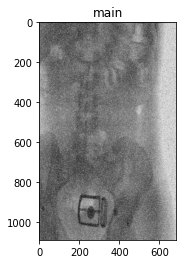

In [7]:
img = cv.imread('Noisy_Spine.png',0)
show_image(img, "main")

### A

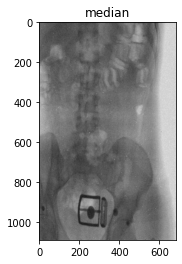

In [8]:
img_median = cv.medianBlur(img,3)
show_image(img_median, "median")

the filter has removed all of the impulses and the result is much more clear.

### B

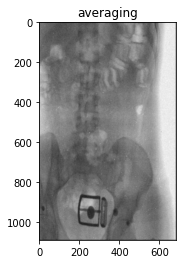

In [17]:
m, n = img_median.shape
img_new = np.zeros([m, n])
def masking(mask, img, img_new):
    for i in range(1, m-1):
        for j in range(1, n-1):
            temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
            
            img_new[i, j]= temp
                
    return img_new.astype(np.uint8)
    
mask = np.ones([3, 3], dtype = int)
mask = mask / (3**2)
img_new = masking(mask, img_median, img_new)
show_image(img_new, "averaging")

the result is a little bit dimmed and smoothed, but we still have the impulses.

### C

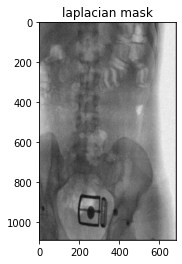

In [18]:
m, n= img_new.shape
c= 0.1
mask= -np.ones([3, 3], dtype = float)
mask[1,1]= 8
laplacian_mask= cv.filter2D(img_new,cv.CV_64F,mask)
laplacian_mask= ((laplacian_mask - np.min(laplacian_mask))/(np.max(laplacian_mask) - np.min(laplacian_mask)))*255
filtered_img= img_new - c*laplacian_mask
filtered_img= np.clip(filtered_img,0,255)
filtered_img= filtered_img.astype(np.uint8)
show_image(filtered_img, "laplacian mask")

### D

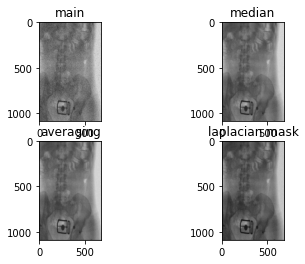

In [19]:
plt.subplot(221)
plt.imshow(img, cmap = 'gray', vmin=0, vmax=255)
plt.title('main')

plt.subplot(222)
plt.imshow(img_median, cmap = 'gray', vmin=0, vmax=255)
plt.title('median')

plt.subplot(223)
plt.imshow(img_new, cmap = 'gray', vmin=0, vmax=255)
plt.title('averaging')

plt.subplot(224)
plt.imshow(filtered_img, cmap = 'gray', vmin=0, vmax=255)
plt.title('laplacian mask')

plt.show()

The laplacian filter can even make the noises sharper, the averaging can not remove them neither.
But medial filter could completely remove them.

### E

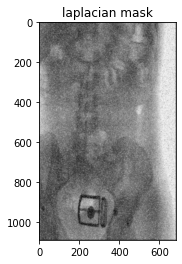

In [20]:
img = cv.imread('Noisy_Spine.png',0)
m, n = img.shape
img_new = np.zeros([m, n])
def masking(mask, img, img_new):
    for i in range(1, m-1):
        for j in range(1, n-1):
            temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
            
            img_new[i, j]= temp
                
    return img_new.astype(np.uint8)
    
mask = np.ones([3, 3], dtype = int)
mask = mask / (3**2)
img_new = masking(mask, img, img_new)
img_median = cv.medianBlur(img_new,3)
m, n= img_median.shape
c= 0.1
mask= -np.ones([3, 3], dtype = float)
mask[1,1]= 8
laplacian_mask= cv.filter2D(img_median,cv.CV_64F,mask)
laplacian_mask= ((laplacian_mask - np.min(laplacian_mask))/(np.max(laplacian_mask) - np.min(laplacian_mask)))*255
filtered_img= img_median - c*laplacian_mask
filtered_img= np.clip(filtered_img,0,255)
filtered_img= filtered_img.astype(np.uint8)
show_image(filtered_img, "laplacian mask")

Seems like the noises are still there. I think after dimming and smoothing the noises with averaging, median can not remove them anymore.